In [1]:
import re
import pandas as pd
import string
import emoji
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
tweets_df = pd.read_csv('tweets.csv')

In [3]:
tweets_df

,Tweet ID,Date Created,Number of Likes,Source of Tweet,Tweet
0,1890053744647401717,2025-02-13 15:01:42+00:00,0,NaN,"Tinjau Program Makan Bergizi Gratis, Danseskoa..."
1,1890053689223876827,2025-02-13 15:01:29+00:00,0,NaN,🍽️✨ Program Makan Bergizi Gratis dapat meningk...
2,1890053643682070881,2025-02-13 15:01:18+00:00,1,NaN,Makin ngga jelas aja ini negara demi makan sia...
3,1890053393311478011,2025-02-13 15:00:19+00:00,0,NaN,"""pa, siang tadi adek makan gratis.""\n\n""dek, m..."
4,1890053355197837730,2025-02-13 15:00:10+00:00,0,NaN,Makan siang gratis https://t.co/FF7x4tFkyt
...,...,...,...,...,...
886,1893239777601667083,2025-02-22 10:01:52+00:00,2,NaN,"hasil dari School Meal Program, atau ""Pradan M..."
887,1893238494870257791,2025-02-22 09:56:46+00:00,0,NaN,Baznas Siap Dukung Program Makan Bergizi Grati...
888,1893238009912295536,2025-02-22 09:54:50+00:00,0,NaN,Makan bergizi gratis yang sebenernya gak grati...
889,1893237952790069460,2025-02-22 09:54:37+00:00,0,NaN,Program makan bergizi gratis memberikan manfaa...


In [4]:
tweets_df.drop(columns=['Tweet ID', 'Date Created', 'Number of Likes', 'Source of Tweet'], inplace=True)

In [5]:
slang_dict = {
    "kaga": "tidak",
    "ngga": "tidak",
    "gada": "tidak",
    "gak": "tidak",
    "ga": "tidak",
    "yg": "yang",
    "udah": "sudah",
    "gue": "saya",
    "lu": "kamu",
    "lo": "kamu",
    "gw": "saya",
    "tuh": "itu",
    "nih": "ini",
    "tp": "tapi",
    "dr": "dari",
    "pd": "pada",
    "gw": "saya",
    "kalo": "kalau",
    "si": "",
    "btw": "ngomong-ngomong",
    "dapet": "dapat",
    "sampe": "sampai",
    "mending": "lebih baik",
    "amp": "dan",
    "aja": "saja",
    "pas": "saat",
    "kayak": "seperti",
    "bilang": "mengatakan",
    "duit": "uang",
    "pinter": "pintar",
    "sih": "",
    "oke": "baik",
    "bikin": "membuat",
    "boong": "bohong",
    "pinter": "pintar",
    "no": "tidak",
    "males": "malas", 
    "episiensi": "efisiensi",
    "anjir": "anjing",
    "bgst": "bangsat"
    
}

In [ ]:
def text_cleaning(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = emoji.demojize(text)
    text = re.sub(r":\w+:", "", text)
    text = re.sub(r'²', '', text)
    return text

def preprocess(text, slang_dict):
    # Cleaning
    text = text_cleaning(text)
    
    # Tokenization + Slang Conversion + Stopwords Removal + Stemming
    stop_words = set(stopwords.words("indonesian"))
    stop_words.discard("tidak")
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    tokens = word_tokenize(text)
    tokens = [slang_dict.get(word, word) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens

In [7]:
tweets_df['Clean Text'] = tweets_df['Tweet'].apply(text_cleaning)
tweets_df = tweets_df.drop_duplicates(subset='Clean Text').reset_index(drop=True)
tweets_df['Preprocess'] = tweets_df['Clean Text'].apply(lambda x: preprocess(x, slang_dict))

In [8]:
tweets_df

,Tweet,Clean Text,Preprocess
0,"Tinjau Program Makan Bergizi Gratis, Danseskoa...",tinjau program makan bergizi gratis danseskoal...,"[tinjau, program, makan, gizi, gratis, dansesk..."
1,🍽️✨ Program Makan Bergizi Gratis dapat meningk...,program makan bergizi gratis dapat meningkatk...,"[program, makan, gizi, gratis, tingkat, ekonom..."
2,Makin ngga jelas aja ini negara demi makan sia...,makin ngga jelas aja ini negara demi makan sia...,"[negara, makan, siang, gratis, lebih baik, per..."
3,"""pa, siang tadi adek makan gratis.""\n\n""dek, m...",pa siang tadi adek makan gratis\n\ndek malam i...,"[pa, siang, adek, makan, gratis, dek, malam, m..."
4,Makan siang gratis https://t.co/FF7x4tFkyt,makan siang gratis,"[makan, siang, gratis]"
...,...,...,...
838,"Geber Makan Bergizi Gratis, Badan Gizi Butuh R...",geber makan bergizi gratis badan gizi butuh rp...,"[geber, makan, gizi, gratis, badan, gizi, butu..."
839,"hasil dari School Meal Program, atau ""Pradan M...",hasil dari school meal program atau pradan man...,"[hasil, school, meal, program, pradan, mantri,..."
840,Baznas Siap Dukung Program Makan Bergizi Grati...,baznas siap dukung program makan bergizi grati...,"[baznas, dukung, program, makan, gizi, gratis,..."
841,Makan bergizi gratis yang sebenernya gak grati...,makan bergizi gratis yang sebenernya gak grati...,"[makan, gizi, gratis, sebenernya, gratis, efis..."


In [9]:
positive_words = {"sehat", "dukung", "presiden", "program", "bantu", "sejahtera", 
                  "tingkat", "prioritas", "hidup", "generasi", "emas", "murah", "ceria", 
                  "nikmat", "enak", "pintar", "sukses"}
negative_words = {"tolak", "anggar", "tidak", "salah", "butuh", "miskin", "kena", "demo", 
                  "bayar", "stunting", "udah", "dapet", "sampe", "janji", "duit", 
                  "cemas", "hutang", "potong", "pangkas", "hilang", "tapi", "mahal", 
                  "bodoh", "hancur", "efisiensi", "antem", "kritis", "anggur", "ancam", 
                  "bohong", "takut", "bubar", "korupsi", "omonomon", "tai", "anjing", 
                  "babi", "bohong", "gelap", "indonesiagelap", "defisit", "phk", "lupa", 
                  "paksa", "malas", "berat", "konyol"}

def determine_sentiment(words):

    if isinstance(words, list):
        positive_count = sum(1 for word in words if word in positive_words)
        negative_count = sum(1 for word in words if word in negative_words)
        sentiment_score = positive_count - negative_count

        if sentiment_score == 0:
            sentiment = "Netral"
        elif sentiment_score > 0:
            sentiment = "Positif"
        else:
            sentiment = "Negatif"

        return sentiment_score, sentiment
    return 0, "Netral"

tweets_df[['Sentiment Score', 'Sentiment']] = tweets_df['Preprocess'].apply(lambda x: pd.Series(determine_sentiment(x)))

In [10]:
sentiment_count = tweets_df['Sentiment'].value_counts()
print(sentiment_count)

Sentiment
Netral     340
Positif    292
Negatif    211
Name: count, dtype: int64


In [11]:
def rejoin_text(tokenized_column):
    return tokenized_column.apply(lambda tokens: " ".join(tokens))

tweets_df['Rejoin Text'] = rejoin_text(tweets_df['Preprocess'])

In [12]:
from sklearn.model_selection import train_test_split

X = tweets_df['Rejoin Text']
y = tweets_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [15]:
dt_pred = dt_model.predict(X_test)

In [16]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Precision:", precision_score(y_test, dt_pred, average='weighted'))
print("Decision Tree Recall:", recall_score(y_test, dt_pred, average='weighted'))
print("Decision Tree F1-score:", f1_score(y_test, dt_pred, average='weighted'))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.8402366863905325
Decision Tree Precision: 0.8388051363865289
Decision Tree Recall: 0.8402366863905325
Decision Tree F1-score: 0.8390947864320644
Decision Tree Classification Report:
               precision    recall  f1-score   support

     Negatif       0.77      0.71      0.74        34
      Netral       0.86      0.87      0.86        82
     Positif       0.85      0.89      0.87        53

    accuracy                           0.84       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.84      0.84      0.84       169



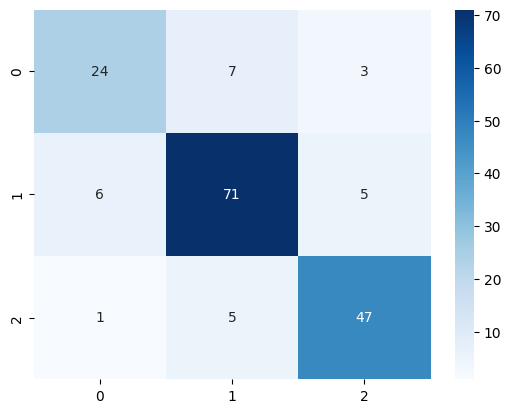

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test, dt_pred)
sns.heatmap(conf, annot=True, cmap='Blues')
plt.show()

In [17]:
# import pickle

In [18]:
# with open('vectorizer.pkl', 'wb') as vectorizer_file:
#     pickle.dump(vectorizer, vectorizer_file)

In [19]:
# with open('DecisionTreeModel.pkl', 'wb') as model_file:
#     pickle.dump(dt_model, model_file)

# with open('DecisionTreeModel.pkl', 'rb') as model_file:
#     loaded_dt_model = pickle.load(model_file)

# input_text = input("Masukkan text anda")

# clean_input = text_cleaning(input_text)
# preprocess_tokens = preprocess(clean_input, slang_dict)
# preprocess_input = "".join(preprocess_tokens)
# vectorize_input = vectorizer.transform([preprocess_input])
# pred_input = loaded_dt_model.predict(vectorize_input)
# print(f'Your Tweet: ', input_text)
# print(f'Sentiment: ', pred_input)
